In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import data

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-_mx3i7ig because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
generator_g = keras.models.load_model("generator_g")
generator_f = keras.models.load_model("generator_f")
discriminator_x = keras.models.load_model("discriminator_x")
discriminator_y = keras.models.load_model("discriminator_y")

In [3]:
test_a_ds, test_b_ds = data.load_test_data()

In [4]:
def generate_save_images(model, inp, tar, idx):
    pred = model(inp)

    plt.figure(figsize=(12, 12))

    display_list = [inp[0], pred[0], tar[0]]
    title = ['Input Image', 'Predicted Image', 'Target Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # 获取范围在 [0, 1] 之间的像素值以绘制它。
        plt.imshow(display_list[i] * 0.5 + 0.5, cmap="gray")
        plt.axis('off')

    plt.savefig('test_img/image_{:04d}.png'.format(idx))
    plt.show()

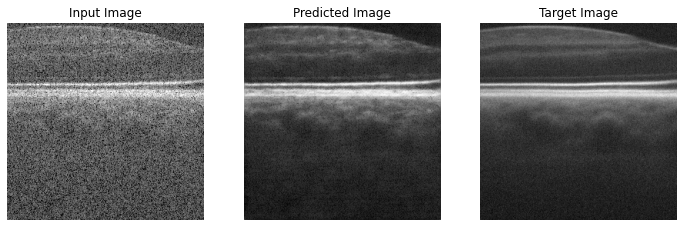

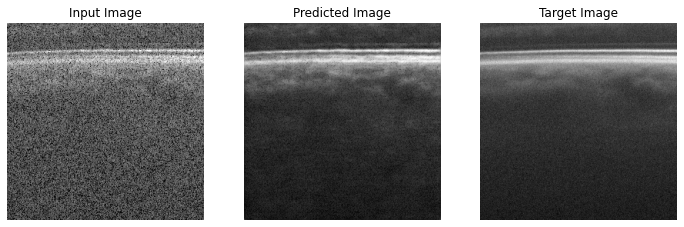

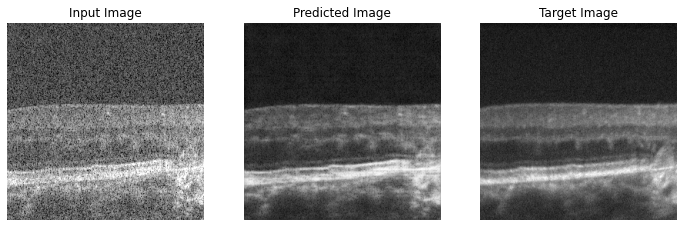

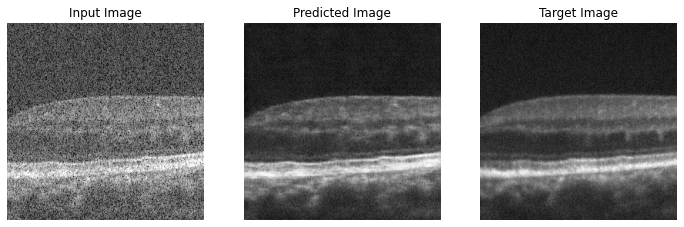

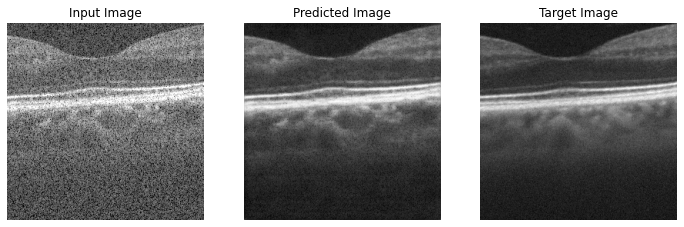

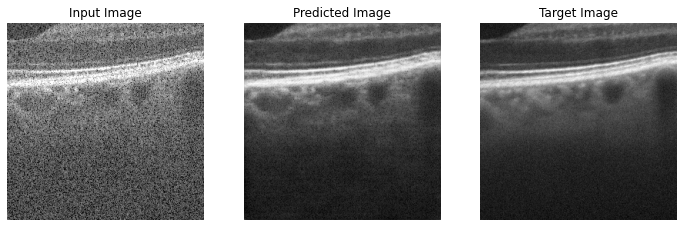

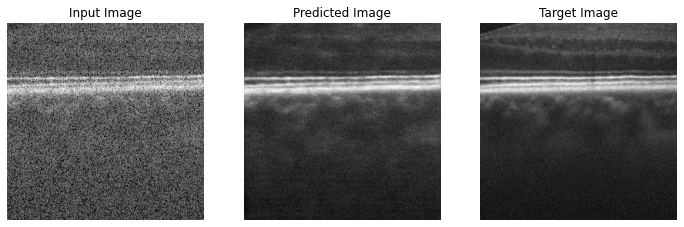

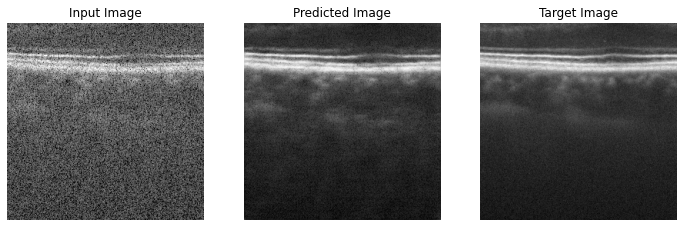

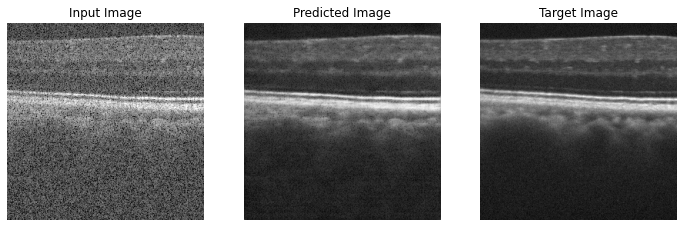

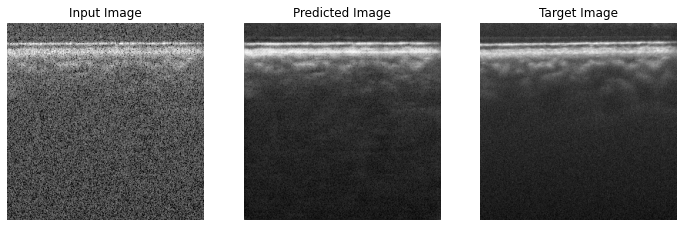

In [7]:
for i, (n, c) in enumerate(tf.data.Dataset.zip((test_a_ds.take(10), test_b_ds.take(10)))):
    generate_save_images(generator_g, n, c, i)